**Predicting Customer Churn at a Bank**

Every month BankCo loses thousands of customers to it’s competitors. The customers who leave the bank are known commonly as ‘churned customers'. 
BankCo has asked you, a data scientist, to help them predict which customers may churn in future so that they can take steps to incentivise those customers to stay.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
# Libraries
from __future__ import print_function
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline

import itertools
import warnings
warnings.filterwarnings("ignore")
import os
import io
import plotly.offline as py #visualization
py.init_notebook_mode(connected=True) #visualization
import plotly.graph_objs as go #visualization
import plotly.tools as tls #visualization
import plotly.figure_factory as ff #visualization
#print(os.listdir("../input"))

**1. Data set review & preparation**

In this section I will seek to explore the structure of our data:

To understand the input space the data set
And to prepare the sets for exploratory and prediction tasks as described in Task above.

In [ ]:
#save filepath to variable for easier access
import pandas as pd
Churn_Modelling = pd.read_csv("../input/churn-modelling/Churn_Modelling.csv", delimiter=',')
Churn_Modelling.shape

Churn_Modelling has 1000 rows with 14 attributes. I will review this further to identify what attributes will be necessary and what data manipulation needs to be carried out before Exploratory analysis and prediction modelling

We can see that the columns name are not consistent.

In [ ]:
# Check columns list and missing values
Churn_Modelling.isnull().sum()

Well and good I find no missing values!

In [ ]:
# Get unique count for each variable
Churn_Modelling.nunique()

From the above, we will not require the first 2 attributes as they are specific to a customer. It is borderline with the surname as this would result to profiling so we exclude this as well.

In [ ]:
# Drop irrelevant columns as explained above
Churn_Modelling = Churn_Modelling.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

In [ ]:
# Review the top rows of what is left in our data
Churn_Modelling.head()

From the above, a couple of question linger:
1.	The data appears to be a snapshot as of some point in time e.g. the balance is for a given date, which leaves many questions:
•	What date is it and of what relevance is this date?
•	Would it be possible to obtain balances over a period as opposed to a single date?
2.	There are customers who have exited but still have a balance in their account! Why and what would that mean? Could they have exited from a product and not the bank?
3.	What does being an active member mean and are there difference degrees to it? Could it be better to provide transaction count both in terms of credits and debits to the account instead?
4.	A break down to the products bought into by a customer could provide more information topping listing of product count
For this exercise, I proceed to model without context even though typically having context and better understanding of the data extraction process would give better insight and possibly lead to better and contextual results of the modelling process


In [ ]:
# Check variable data types for easy data analysis
Churn_Modelling.dtypes

I found out that I moslty have categorical variables and 6 continuous variables

3. **Exploratory Data Analysis**

Here my main interest is to get an understanding as to how the given attributes relate to the 'Exit' status.

In [ ]:
#Pie chart showing proportion of Churned customer and Non Churned customer
labels = 'Exited', 'Retained'
sizes = [Churn_Modelling.Exited[Churn_Modelling['Exited']==1].count(), Churn_Modelling.Exited[Churn_Modelling['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

We have about 20% of the customers that have churned. So the baseline model could be to predict that 20% of the customers will churn. Given 20% is a small number, we need to ensure that the chosen model does predict with great accuracy this 20% as it is of interest to the bank to identify and keep this bunch as opposed to accurately predicting the customers that are retained.

**I want to take a look on Distribution of the categorical variables by customer attrition like Geographical, etc**

In [ ]:
# Review of the 'Custmer Attrition' in relation with categorical variables
    fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
    sns.countplot(x='Geography', hue = 'Exited',data = Churn_Modelling, ax=axarr[0][0]) #Count plot showing Exited and Retained customers by Geograpical location
    sns.countplot(x='Gender', hue = 'Exited',data = Churn_Modelling, ax=axarr[0][1]) #Count plot showing Exited and Retained customers by Gender
    sns.countplot(x='HasCrCard', hue = 'Exited',data = Churn_Modelling, ax=axarr[1][0])#Count plot showing Exited and Retained customers by Holding card or not
    sns.countplot(x='IsActiveMember', hue = 'Exited',data = Churn_Modelling, ax=axarr[1]
[1]) #Count plot showing Exited and Retained customers by there status if they are active or not

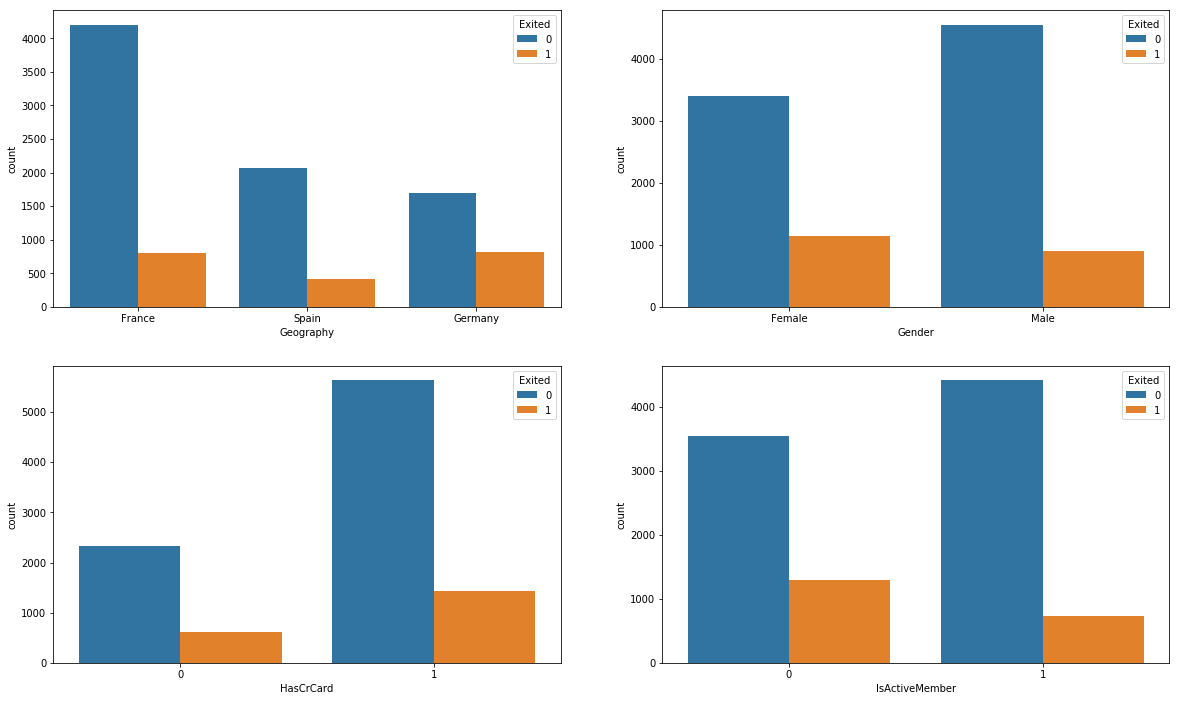

Here are the major insights of our data:

•	Majority of the data is of customers from France. However, the proportion of churned customers is with inversely related to the population of customers alluding to the bank possibly having a problem (maybe not enough customer service resources allocated) in the areas where it has fewer clients.

•	The proportion of female customers churning is also greater than that of male customers

•	Interestingly, majority of the customers who are churned are those with credit cards. Given that majority of the customers have credit cards could prove this to be just a coincidence.

•	There is no surprise that the inactive customers are likely to churn. Worryingly is that the overall proportion of inactive members is quite high suggesting that the bank may need a program implemented to turn this group to active customers, as this will definitely have a positive impact on customer churn.

In [ ]:
# Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = Churn_Modelling, ax=axarr[0][0]) #Relation between Exit status of customers and credit score using box plot
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = Churn_Modelling , ax=axarr[0][1]) #Relation between Exit status of customers and age using box plot
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = Churn_Modelling, ax=axarr[1][0]) #Relation between Exit status of customers and tenure using box plot
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = Churn_Modelling, ax=axarr[1][1]) #Relation between Exit status of customers and Balance using box plot
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = Churn_Modelling, ax=axarr[2][0])#Relation between Exit status of customers and Number of products using box plot
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = Churn_Modelling, ax=axarr[2][1])#Relation between Exit status of customers and Estimated Salary using box plot

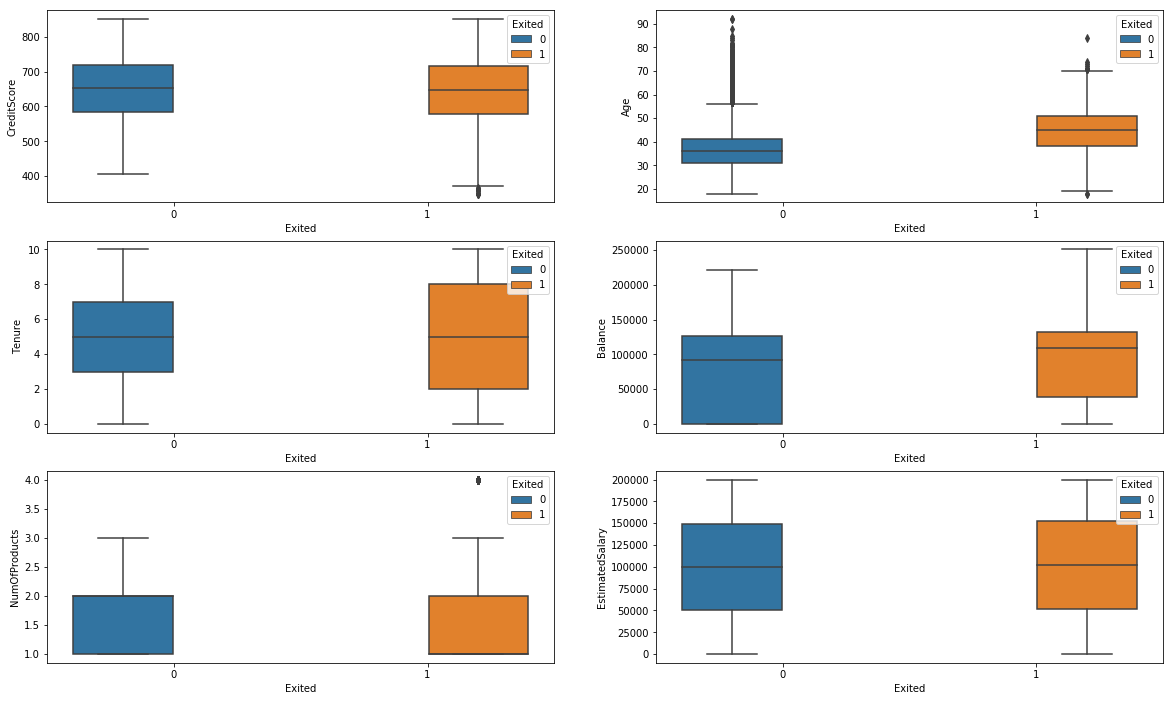

I have noted the following:

•	There is no significant difference in the credit score distribution between retained and churned customers.

•	The older customers are churning at more rate than the younger ones alluding to a difference in service preference in the age categories. The bank may need to review their target market or review the strategy for retention between the different age groups

•	With regard to the tenure, the clients on either extreme end (spent little time with the bank or a lot of time with the bank) are more likely to churn compared to those that are of average tenure.

•	Worryingly, the bank is losing customers with significant bank balances, which is likely to hit their available capital for lending.

•	Neither the product nor the salary has a significant effect on the likelihood to churn.


**Correlation**

The term correlation refers to a mutual relationship or association between quantities. 
So, here, we will find out what kind of association is present among the different data attributes.

In [ ]:
# Get the correlation matrix of the training dataset

Churn_Modelling[Churn_Modelling.columns].corr()

In [ ]:
# Visualization of the correlation matrix using heatmap plot
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(Churn_Modelling[Churn_Modelling.columns[:10]].corr(), annot = True,fmt = ".1f")
plt.show()

**The following facts can be derived from the graph:**

Cells with 1.0 values are highly correlated with each other;
Each attribute has a very high correlation with itself, so all the diagonal values are 1.0;

Balance attribute is negatively correlated with numberofproducts attribute. It means one attribute increases as the other decreases, and vice versa.

Age is positively correlated with being active.

**3. Feature engineering**

Here I am seeking to add features that are likely to have an impact on the probability of churning. I will firstly split the train and test sets

In [ ]:
# Split Train, test data
Churn_Modelling_train = Churn_Modelling.sample(frac=0.8,random_state=200)
Churn_Modelling_test = Churn_Modelling.drop(Churn_Modelling_train.index)
print(len(Churn_Modelling_train))
print(len(Churn_Modelling_test))

The code above splits the training data. I will use  80%  of the Churn_Modelling data for actual training purposes, and once training is completed, we will use the remaining  20%  of the Churn_Modelling data to check the training accuracy of our trained model.

In [ ]:
# Box ploting the ratio of the bank balance and the estimated salary to seen how they are related to customer churn
Churn_Modelling_train['BalanceSalaryRatio'] = Churn_Modelling_train.Balance/Churn_Modelling.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = Churn_Modelling_train)
plt.ylim(-1, 5)

I have previously shown that the salary has little effect on the chance of a customer churning. 
However as seen above, the ratio of the bank balance and the estimated salary indicates that customers with a higher balance salary ratio churn more which would be worrying to the bank as this impacts their deposits hence affecting loan capital.

In [ ]:
# Given that tenure is a 'function' of age, we introduce a variable aiming to standardize tenure over age:
Churn_Modelling_train['TenureByAge'] = Churn_Modelling_train.Tenure/(Churn_Modelling_train.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = Churn_Modelling_train)
plt.ylim(-1, 1)
plt.show()

In [ ]:
#Lastly I want to introduce a variable to capture credit score given age to take into account credit behaviour visavis adult life
Churn_Modelling_train['CreditScoreGivenAge'] = Churn_Modelling_train.CreditScore/(Churn_Modelling_train.Age)

In [ ]:
# Let look on new Data set for Churn_Modelling
Churn_Modelling_train.head()

**4. Data preparation to fit the model**

In [ ]:
# Arrange columns by data type for easier manipulation
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']
Churn_Modelling_train = Churn_Modelling_train[['Exited'] + continuous_vars + cat_vars]
Churn_Modelling_train.head()

In [ ]:
#For the one hot variables, we change 0 to -1 so that the models can capture a negative relation where the attribute in inapplicable instead of 0'''
Churn_Modelling_train.loc[Churn_Modelling_train.HasCrCard == 0, 'HasCrCard'] = -1
Churn_Modelling_train.loc[Churn_Modelling_train.IsActiveMember == 0, 'IsActiveMember'] = -1
Churn_Modelling_train.head()

In [ ]:
# One hot encode the categorical variables
lst = ['Geography', 'Gender']
remove = list()
for i in lst:
    if (Churn_Modelling_train[i].dtype == np.str or Churn_Modelling_train[i].dtype == np.object):
        for j in Churn_Modelling_train[i].unique():
            Churn_Modelling_train[i+'_'+j] = np.where(Churn_Modelling_train[i] == j,1,-1)
        remove.append(i)
Churn_Modelling_train = Churn_Modelling_train.drop(remove, axis=1)
Churn_Modelling_train.head()


In [ ]:
# MinMax scaling of the continuous variables
minVec = Churn_Modelling_train[continuous_vars].min().copy()
maxVec = Churn_Modelling_train[continuous_vars].max().copy()
Churn_Modelling_train[continuous_vars] = (Churn_Modelling_train[continuous_vars]-minVec)/(maxVec-minVec)
Churn_Modelling_train.head()

In [ ]:
# data prep pipeline for test data
def DfPrepPipeline(Churn_Modelling_predict,Churn_Modelling_train_Cols,minVec,maxVec):
    # Add new features
    Churn_Modelling_predict['BalanceSalaryRatio'] = Churn_Modelling_predict.Balance/Churn_Modelling_predict.EstimatedSalary
    Churn_Modelling_predict['TenureByAge'] = Churn_Modelling_predict.Tenure/(Churn_Modelling_predict.Age - 18)
    Churn_Modelling_predict['CreditScoreGivenAge'] = Churn_Modelling_predict.CreditScore/(Churn_Modelling_predict.Age - 18)
    # Reorder the columns
    continuous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
    cat_vars = ['HasCrCard','IsActiveMember',"Geography", "Gender"] 
    Churn_Modelling_predict = Churn_Modelling_predict[['Exited'] + continuous_vars + cat_vars]
    # Change the 0 in categorical variables to -1
    Churn_Modelling_predict.loc[Churn_Modelling_predict.HasCrCard == 0, 'HasCrCard'] = -1
    Churn_Modelling_predict.loc[Churn_Modelling_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    # One hot encode the categorical variables
    lst = ["Geography", "Gender"]
    remove = list()
    for i in lst:
        for j in Churn_Modelling_predict[i].unique():
            Churn_Modelling_predict[i+'_'+j] = np.where(Churn_Modelling_predict[i] == j,1,-1)
        remove.append(i)
    Churn_Modelling_predict = Churn_Modelling_predict.drop(remove, axis=1)
    # Ensure that all one hot encoded variables that appear in the train data appear in the subsequent data
    L = list(set(Churn_Modelling_train_Cols) - set(Churn_Modelling_predict.columns))
    for l in L:
        Churn_Modelling_predict[str(l)] = -1        
    # MinMax scaling coontinuous variables based on min and max from the train data
    Churn_Modelling_predict[continuous_vars] = (Churn_Modelling_predict[continuous_vars]-minVec)/(maxVec-minVec)
    # Ensure that The variables are ordered in the same way as was ordered in the train set
    Churn_Modelling_predict = Churn_Modelling_predict[Churn_Modelling_train_Cols]
    return Churn_Modelling_predict

**5. Model fitting and Selecting Machine Learning Algorithms**

Since I am modelling a critic problem for that we need model with high performance possible. Here, I will try a couple of different machine learning algorithms in order to get an idea about which machine learning algorithm performs better. Also, I will perform a accuracy comparison amoung them. 

As our problem is a classification problem, the algorithms that I am going to perform are as follows:

* K-Nearest Neighbor (KNN)

* Logistic Regression (LR) in the primal space and with different kernels

* AdaBoost

* Gradient Boosting (GB)

* RandomForest (RF)

* SVM in the primal and with different Kernels
 
* Ensemble models

In [ ]:
# Support functions
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from scipy.stats import uniform

# Fit models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Scoring functions
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Function to give best model score and parameters
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)
def get_auc_scores(y_actual, method,method2):
    auc_score = roc_auc_score(y_actual, method); 
    fpr_Churn_Modelling, tpr_Churn_Modelling, _ = roc_curve(y_actual, method2); 
    return (auc_score, fpr_Churn_Modelling, tpr_Churn_Modelling)

In [ ]:
# Fit primal logistic regression
param_grid = {'C': [0.1,0.5,1,10,50,100], 'max_iter': [250], 'fit_intercept':[True],'intercept_scaling':[1],
              'penalty':['l2'], 'tol':[0.00001,0.0001,0.000001]}
log_primal_Grid = GridSearchCV(LogisticRegression(solver='lbfgs'),param_grid, cv=10, refit=True, verbose=0)
log_primal_Grid.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)
best_model(log_primal_Grid)

In [ ]:
# Fit logistic regression with degree 2 polynomial kernel
param_grid = {'C': [0.1,10,50], 'max_iter': [300,500], 'fit_intercept':[True],'intercept_scaling':[1],'penalty':['l2'],
              'tol':[0.0001,0.000001]}
poly2 = PolynomialFeatures(degree=2)
Churn_Modelling_train_pol2 = poly2.fit_transform(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])
log_pol2_Grid = GridSearchCV(LogisticRegression(solver = 'liblinear'),param_grid, cv=5, refit=True, verbose=0)
log_pol2_Grid.fit(Churn_Modelling_train_pol2,Churn_Modelling_train.Exited)
best_model(log_pol2_Grid)

In [ ]:
# Fit SVM with RBF Kernel
param_grid = {'C': [0.5,100,150], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)
best_model(SVM_grid)

In [ ]:
# Fit SVM with pol kernel
param_grid = {'C': [0.5,1,10,50,100], 'gamma': [0.1,0.01,0.001],'probability':[True],'kernel': ['poly'],'degree':[2,3] }
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)
best_model(SVM_grid)

In [ ]:
# Fit random forest classifier
param_grid = {'max_depth': [3, 5, 6, 7, 8], 'max_features': [2,4,6,7,8,9],'n_estimators':[50,100],'min_samples_split': [3, 5, 6, 7]}
RanFor_grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, refit=True, verbose=0)
RanFor_grid.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)
best_model(RanFor_grid)

In [ ]:
# Fit Extreme Gradient boosting classifier
param_grid = {'max_depth': [5,6,7,8], 'gamma': [0.01,0.001,0.001],'min_child_weight':[1,5,10], 'learning_rate': [0.05,0.1, 0.2, 0.3], 'n_estimators':[5,10,20,100]}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid, cv=5, refit=True, verbose=0)
xgb_grid.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)
best_model(xgb_grid)

**Fit best Models**

In [ ]:
# Fit primal logistic regression
log_primal = LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=250, multi_class='ovr',n_jobs=None, 
                                penalty='l2', random_state=None, solver='lbfgs',tol=1e-05, verbose=0, warm_start=False)
log_primal.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)

In [ ]:
# Fit logistic regression with pol 2 kernel
poly2 = PolynomialFeatures(degree=2)
Churn_Modelling_train_pol2 = poly2.fit_transform(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])
log_pol2 = LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,intercept_scaling=1, max_iter=300, multi_class='ovr', n_jobs=None, 
                              penalty='l2', random_state=None, solver='liblinear',tol=0.0001, verbose=0, warm_start=False)
log_pol2.fit(Churn_Modelling_train_pol2,Churn_Modelling_train.Exited)

In [ ]:
# Fit SVM with RBF Kernel
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, 
              random_state=None, shrinking=True,tol=0.001, verbose=False)
SVM_RBF.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)

In [ ]:
# Fit SVM with Pol Kernel
SVM_POL = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,  decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',  max_iter=-1,
              probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_POL.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)

In [ ]:
# Fit Random Forest classifier
RF = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',max_depth=8, max_features=6, max_leaf_nodes=None,min_impurity_decrease=0.0,
                            min_impurity_split=None,min_samples_leaf=1, min_samples_split=3,min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
                            oob_score=False, random_state=None, verbose=0,warm_start=False)
RF.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)

In [ ]:
# Fit Extreme Gradient Boost Classifier
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,colsample_bytree=1, gamma=0.01, learning_rate=0.1, max_delta_step=0,max_depth=7,
                    min_child_weight=5, missing=None, n_estimators=20,n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,reg_alpha=0, 
                    reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=1)
XGB.fit(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'],Churn_Modelling_train.Exited)

Now I am going to review best model fit accuracy : Keen interest is on the performance in predicting next Customers who churn

In [ ]:
print(classification_report(Churn_Modelling_train.Exited, log_primal.predict(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])))

In [ ]:
print(classification_report(Churn_Modelling_train.Exited,  log_pol2.predict(Churn_Modelling_train_pol2)))

In [ ]:
print(classification_report(Churn_Modelling_train.Exited,  SVM_RBF.predict(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])))

In [ ]:
print(classification_report(Churn_Modelling_train.Exited,  SVM_POL.predict(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])))

In [ ]:
print(classification_report(Churn_Modelling_train.Exited,  RF.predict(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])))

In [ ]:
print(classification_report(Churn_Modelling_train.Exited,  XGB.predict(Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited'])))

In [ ]:
y = Churn_Modelling_train.Exited
X = Churn_Modelling_train.loc[:, Churn_Modelling_train.columns != 'Exited']
X_pol2 = Churn_Modelling_train_pol2
auc_log_primal, fpr_log_primal, tpr_log_primal = get_auc_scores(y, log_primal.predict(X),log_primal.predict_proba(X)[:,1])
auc_log_pol2, fpr_log_pol2, tpr_log_pol2 = get_auc_scores(y, log_pol2.predict(X_pol2),log_pol2.predict_proba(X_pol2)[:,1])
auc_SVM_RBF, fpr_SVM_RBF, tpr_SVM_RBF = get_auc_scores(y, SVM_RBF.predict(X),SVM_RBF.predict_proba(X)[:,1])
auc_SVM_POL, fpr_SVM_POL, tpr_SVM_POL = get_auc_scores(y, SVM_POL.predict(X),SVM_POL.predict_proba(X)[:,1])
auc_RF, fpr_RF, tpr_RF = get_auc_scores(y, RF.predict(X),RF.predict_proba(X)[:,1])
auc_XGB, fpr_XGB, tpr_XGB = get_auc_scores(y, XGB.predict(X),XGB.predict_proba(X)[:,1])

In [ ]:
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_log_primal, tpr_log_primal, label = 'log primal Score: ' + str(round(auc_log_primal, 5)))
plt.plot(fpr_log_pol2, tpr_log_pol2, label = 'log pol2 score: ' + str(round(auc_log_pol2, 5)))
plt.plot(fpr_SVM_RBF, tpr_SVM_RBF, label = 'SVM RBF Score: ' + str(round(auc_SVM_RBF, 5)))
plt.plot(fpr_SVM_POL, tpr_SVM_POL, label = 'SVM POL Score: ' + str(round(auc_SVM_POL, 5)))
plt.plot(fpr_RF, tpr_RF, label = 'RF score: ' + str(round(auc_RF, 5)))
plt.plot(fpr_XGB, tpr_XGB, label = 'XGB score: ' + str(round(auc_XGB, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

From the above results, my main aim is to predict the customers that will possibly churn so they can be put in some sort of scheme to prevent churn hence the recall measures on the next customers to churn is of more importance to me than the overall accuracy score of the model.

Given that in the data I only had 20% of churn, a recall greater than this baseline will already be an improvement but I want to get as high as possible while trying to maintain a high precision so that the bank can train its resources effectively towards clients highlighted by the model without wasting too much resources on the false positives.

From the review of the fitted models above, the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on next customer to churn of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned.

**Test model prediction accuracy on test data**

In [ ]:
# Make the data transformation for test data
Churn_Modelling_test = DfPrepPipeline(Churn_Modelling_test,Churn_Modelling_train.columns,minVec,maxVec)
Churn_Modelling_test = Churn_Modelling_test.mask(np.isinf(Churn_Modelling_test))
Churn_Modelling_test = Churn_Modelling_test.dropna()
Churn_Modelling_test.shape

In [ ]:
print(classification_report(Churn_Modelling_test.Exited,  RF.predict(Churn_Modelling_test.loc[:, Churn_Modelling_test.columns != 'Exited'])))

In [ ]:
auc_RF_test, fpr_RF_test, tpr_RF_test = get_auc_scores(Churn_Modelling_test.Exited, RF.predict(Churn_Modelling_test.loc[:, Churn_Modelling_test.columns != 'Exited']),
                                                       RF.predict_proba(Churn_Modelling_test.loc[:, Churn_Modelling_test.columns != 'Exited'])[:,1])
plt.figure(figsize = (12,6), linewidth= 1)
plt.plot(fpr_RF_test, tpr_RF_test, label = 'RF score: ' + str(round(auc_RF_test, 5)))
plt.plot([0,1], [0,1], 'k--', label = 'Random: 0.5')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend(loc='best')
#plt.savefig('roc_results_ratios.png')
plt.show()

**6. Conclusion**

The precision of the model on previousy unseen test data is slightly higher with regard to predicting next customer to churn i.e. those customers that churn.

In this project I have built a model that predict how likely a customer is going to churn. 

During exploratory data analysis we found out that the female customer are the most likely to churn, customer that are located in Germany are the most churned, and also customer using only one product are the most churned. 

After building several model I found the best model that gives a decent balance of the recall and precision is the random forest where according to the fit on the training set, with a precision score on next customer to churn of 0.88, out of all customers that the model thinks will churn, 88% do actually churn and with the recall score of 0.53 on the 1's, the model is able to highlight 53% of all those who churned. 

However, in as much as the model has a high accuracy, it still misses about half of those who end up churning. This could be improved by providing retraining the model with more data over time while in the meantime working with the model to save the 41% that would have churned.
